#Types of Attention



##Learning Objectives:
_____________
By the end of the lesson, all learners will be able to (minimum expected from everyone) :

- Introduce the various types of attention with illustrative examples

- Discuss the mathematical implementations of various types of attention

##Prerequisites:
_____
To start this lesson **all students must be aware** of the following concepts:

- Sequential Learning

- Seq2Seq Networks

- Attention Mechanism



## Self Attention

Self-Attention as the name suggests is the mechanism of giving out attention towards itself. 

Consider the sentence:
```
The dog did not eat the food because it was not hungry.
```
Here, we easily know that the word "it" is referreing to the dog. But, a machine may have a hard time understanding this. So, self-attention plays a role to associate "it" with the "dog". Self-attention associates a word at different positions in the sentence which helps make a better encoding for the word.

The unique thing about the self attention is that it ignores the distance between words and directly computes dependency relationships of words among one another. This makes it capable of learning the internal structure of a sentence too.

Let's see a single figurative demonstration of words computing the attention with themselves.

<div align="center">
<figure>


<p>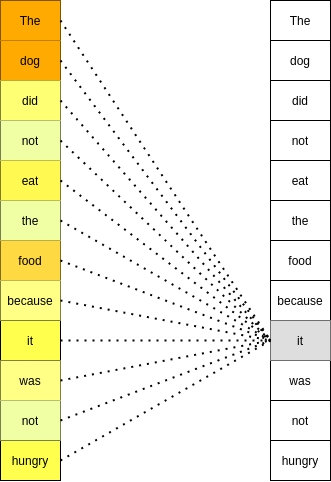</p>

<figcaption>Figure 1. Self attention among Words in a sentence
</figcaption>
</figure>
</div>



Using self-attention, more attention should be given to **The Dog** compared to the other words.

This was a simple introduction to the self-attention. We will discuss more about it on the Chapter **Attention is all you Need.**




###Global Attention

In this type of attention all the encoders' current state is used for defining the attention-based context vector $c_t$. Context vector is defined as the vector representation of words, document and queries: this is calculated after we find the aligment vector. The alignment vector  $a_t$ is calculated by comparing the current  target hidden state $h_t$ and source hidden state $h_s$.<br>

$$\alpha_t(s)=alig(h_t,h_s)$$

$$=\frac{exp(score(h_t,h_s))}{\sum_s exp(score(h_t,h_s))}$$

Now for calculating context vector $c_t$,we have
$$c_t=\sum_s \alpha_t h_s$$



Score is known as context based function. This function has three different alternatives.


$$score(h_t, h_s)=\left\{\begin{matrix}
h_t^Th_s \ \ \ \ dot\\ 
h_t^TW_ah_s \ \ \ \ general \\ 
v_a^T\tanh(W_a\left [ h_t;h_s \right ]) \ \ \ \ concat
\end{matrix}\right.$$

Here,
 $T,W_a$ represents the transpose of matrix and weight of attention layer respectively.


Global attention has a drawback. It has to attend all the words from source to each target word. This is very expensive and impractical to long sequence machine translation.
This attention is similar to soft attention.<br>


<div align="center">
<figure>
<img width = "600" height = "600"  src="https://drive.google.com/uc?export=download&id=1kNv4DwkofTF5sldaHCb-7xBSpYnjdeH3" alt="globalattention">
<figcaption>Figure 2. Global Attention
</figcaption>
</figure>
</div>




###Local Attention

This model is designed to remove the drawback of Global attention. Here only a few encoder states are used for defining attention based context vector. It only focuses on a small subset of the source word. Because of this idea, even though the input sequence is large as we do not consider all the encoder sequence, so the computation speed is much faster compared to Global attention.

<div align="center">
<figure>
<img width = "600" height = "600" src="https://drive.google.com/uc?export=download&id=14_zFU1BZrMb5xubZ8c8OcTEDJaoOGYTN" alt="localattention">
<figcaption>Figure 3. Local Attention
</figcaption>
</figure>
</div> 


<h3>What is  the  difference between global and local attention?</h3>

According to paper [Effective Approaches to Attention-based Neural Machine Translation](https://www-nlp.stanford.edu/pubs/emnlp15_attn.pdf)
global attention looks for all the inputs of words while in local attention subset of input words are looked.
Also, local attention is a combination of hard and soft attention. So, it is easy to train and implement. Global attention is similar to soft attention.

Let's see what hard and soft attentions are.



### Soft Attention

It is the attention that are quite similar to the Global Attention. In soft attention, the alignment weights are learned and placed "softly" i.e. in differentiable forms over all the patches of the input image in case of visual attention and all words of input sequence in case of translation or seq2seq models. Context vector is calculated as a weighted sum of encoder hidden state. Soft attention mechanism use softmax function which  has the advantage,  the model is smooth and differentiable. So  usual methods of gradient descent can be applied to train the model. However, soft attention can prove computationally expensive and in some scenarios like game playing and in reinforcement learning it may be impossible to give attention to all parts.
Equations for calculating weighted sum of hidden state are:

$$score(h_t, h_s)=\left\{\begin{matrix}
h_t^Th_s \ \ \ \ dot\\ 
h_t^TW_ah_s \ \ \ \ general \\ 
v_a^T\tanh(W_a\left [ h_t;h_s \right ]) \ \ \ \ concat
\end{matrix}\right.$$

After this we will calculate attention weights

$$\alpha_t(s)=alig(h_t,h_s)$$

$$=\frac{exp(score(h_t,h_s))}{\sum_s exp(score(h_t,h_s))}$$

<div align="center">
<figure>
<img  src="https://drive.google.com/uc?export=download&id=1dODW5ou94LVw8frt-TtsjLnWq_QTEXTe"> 
<figcaption>Figure 4. Soft Attention
</figcaption>
</figure>
</div> 








### Luong's Attention in Tensorflow



In [ ]:
import tensorflow as tf

class Attentionlayer(tf.keras.Model):
    """
    Implements Luong's Attention (concatenation method)
    score = v_{a^T} * tanh(W_a[h_t; h_s])
    where,
    h_t = decoder hidden states
    h_s = encoder hidden states
  
    Attributes
    ----------
    units: int 
      No. of units in dense layer
    Methods
    -------
    call(dec_h_t, enc_h_s)
        Forward pass for the Attentionlayer
    """
    def __init__(self,units):
      super(Attentionlayer, self).__init__()
      self.W_a = tf.keras.layers.Dense(units)
      self.v_a = tf.keras.layers.Dense(1)

    def call(self,dec_h_t, enc_h_s):
      """
      Parameters
      ----------
      dec_h_t: tf.Tensor
              Tensor containing hidden states of decoder at particular time steps
      enc_h_s: int
              Tensor containing output of encoder
      Returns
      ------
      context_vector: tf.Tensor
                Tensor containing context_vector 
      a_t: tf.Tensor
                Tensor containing attention weights
      """
      # to match the shape for both encoder and decoder state, we braodcast the decoder hidden state
      new_dec_h_t=tf.broadcast_to(dec_h_t,shape=(enc_h_s.shape[0],max_len_inputs,LATENT_DIMS))
      score = self.v_a(tf.nn.tanh(self.W_a(tf.concat([new_dec_h_t,enc_h_s],axis=-1))))
      # a_t shape == (batch_size, seq_len, 1)
      a_t = tf.nn.softmax(score, axis=1)
      # context_vector shape == (batch_size, units)
      context_vector = tf.reduce_sum(a_t * enc_h_s, axis=1)
      return context_vector,a_t

### Luong's Attention in PyTorch



In [ ]:
import torch
from torch import nn

class AttentionLayer(nn.Module):
    """
    Implements Luong's Attention (concatenation method)
    score = v_{a^T} * tanh(W_a[h_t; h_s])
    where,
    h_t = decoder hidden states
    h_s = encoder hidden states
  
    Attributes
    ----------
    units: int 
      No. of units in dense layer
    Methods
    -------
    forward(dec_h_t, enc_h_s)
        Forward pass for the Attentionlayer
    """
    def __init__(self, enc_hidden_dim, dec_hidden_dim, attn_units):
        super(AttentionLayer, self).__init__()
        self.W_a = nn.Linear(enc_hidden_dim + dec_hidden_dim, attn_units)  #TODO decide input shape
        self.v_a = nn.Linear(attn_units, 1)
    
    def forward(self, dec_h_t, enc_h_s):
        """
        Parameters
        ----------
        dec_h_t: tf.Tensor
                Tensor containing hidden states of decoder at particular time steps
                Shape: (batch_size, dec_hidden_dim)
        enc_h_s: int
                Tensor containing output of encoder
                Shape: (batch_size, enc_seq_len, enc_hidden_dim)
        Returns
        ------
        context_vector: tf.Tensor
                Tensor containing context_vector 
        a_t: tf.Tensor
                Tensor containing attention weights
        """
        # to match the shape for both encoder and decoder state, we braodcast the decoder hidden state
        enc_seq_len = enc_h_s.size()[1]
        new_dec_h = dec_h_t.unsqueeze(dim=1).repeat_interleave(enc_seq_len, dim=1)
        score = self.v_a(torch.tanh(self.W_a(torch.concat([new_dec_h, enc_h_s], dim=-1))))

        # a_t shape == (batch_size, enc_seq_len, 1)
        a_t = torch.softmax(score, dim=1)

        # context_vector shape == (batch_size, attn_units)
        context_vector = torch.sum(enc_h_s * a_t, axis=1)
        return context_vector,a_t

In [ ]:
batch_size = 32
enc_hidden_dim = 128
dec_hidden_dim = 256
attn_units = 512
enc_seq_len = 64

attn_layer = AttentionLayer(enc_hidden_dim, dec_hidden_dim, attn_units)
context_vector, attn_weights = attn_layer(torch.randn((batch_size, dec_hidden_dim)), torch.randn((batch_size, enc_seq_len, enc_hidden_dim)))
context_vector.shape, attn_weights.shape

(torch.Size([32, 128]), torch.Size([32, 64, 1]))

### Hard Attention
In hard attention, attention score is used to select a single hidden state i.e only part of the input data is selected to focus/attend at a time.

Equation for hard attention :
$$c_t=arg\max_{hs}(\alpha_t)$$
<br> As, we know that heavyside step function (function whose value is 0 for negative numbers and 1 for positive) is hard because it swings between off and on state also, it has zero gradients everywhere except origin. This switch mechanism is used to attend a region or not of an input data.

Compared to soft attention it is less expensive in terms of computation. However, it also has a drawback. As the only part of the input is attended to at a time, the model is non-differentiable and requires more complicated techniques such as variance reduction or reinforcement learning to train. Meaning, for example we have the outputs from all the encoder hidden state. Instead of calculating the weights by concatenating the outputs of all the hidden state encoders, we calculate the attention weights for every single encoders. After that, we use functions like `argmax` to give attention to particular hidden state encoders. Because of this reason they are not easily differentiable and had to go through other techniques to backpropagate. Here, we cannot use the gradient descent algorithm and back prop algorithm.

<div align="center">
<figure>
<img  src="https://drive.google.com/uc?export=download&id=1pR9ORT9SUSsxHIjweU4WmYcqIntgiu3w" alt="Hard Attention"> 
<figcaption>Figure 5. Hard Attention
</figcaption>
</figure>
</div> 


<h5>Below figure gives the clear view of hard attention and soft attention.<h5>

<div align="center">
<figure>
<img  src="https://drive.google.com/uc?export=download&id=1CE5sqc93Mzi7-_Je2FMtrejJMYAbos94" alt="Hard vs  Soft Attention">
<figcaption>Figure 6. Hard vs  Soft Attention
</figcaption>
</figure>
</div> 

 







# Takeaways
The main takeaways from this lesson are:

 - Self Attention ignores the distance between words and directly computes dependency relationships of words among one another. This makes it capable of learning the internal structure of a sentence too.

- On a global attention all the encoder states are used for the computation of the attention that’s why the name global.

- Global Attention does not work well on long sequences.

- Local attention mitigates the limitations of the global attention as it is able to work on the long sequence because it takes a subset of the input encoder sequence.

- Hard attention samples the input and attends only part of the input at a time. So, because sampling operation is non-differentiable, thus it requires more complex techniques like variance reduction and reinforcement learning to train.




# References

[1] [Luong, M.-T., Pham, H. & Manning, C. D. (2015). Effective approaches to attention-based neural machine translation. arXiv preprint arXiv:1508.04025, .](http://arxiv.org/abs/1508.04025)

[2]. http://jalammar.github.io/illustrated-transformer/, Transformers

[3]. https://lilianweng.github.io/lil-log/2018/06/24/attention-attention.html, Attention Mechanisms

